**Inverse Power Method**

In [1]:
A=rand(5,5)

5×5 Array{Float64,2}:
 0.23136   0.113413  0.56192   0.0133022  0.544549
 0.160613  0.877895  0.225478  0.830307   0.851986
 0.515362  0.085126  0.87358   0.136809   0.31097
 0.413041  0.652617  0.818995  0.291155   0.520156
 0.140333  0.811691  0.609246  0.671665   6.97749e-6

In [2]:
using LinearAlgebra

Use the built-in subroutine to find the eigenvalues and
eigenvectors to compare with later.

In [8]:
lambdas=eigvals(A)

5-element Array{Complex{Float64},1}:
  -0.4722901439086724 + 0.0im
 -0.20037985388454294 - 0.03925070427347015im
 -0.20037985388454294 + 0.03925070427347015im
   0.8641822480268515 + 0.0im
   2.2828645224004904 + 0.0im

In [7]:
eigvecs(A)

5×5 Array{Complex{Float64},2}:
   0.497309+0.0im  …   0.230796+0.0im  -0.236473+0.0im
    0.48943+0.0im     -0.730327+0.0im  -0.642303+0.0im
 -0.0437875+0.0im      0.608253+0.0im  -0.274938+0.0im
  -0.166746+0.0im     0.0153814+0.0im  -0.493043+0.0im
  -0.695284+0.0im     -0.207718+0.0im  -0.461352+0.0im

Note that when arranged in order of increasing magnitude
there largest eigenvector is unique.  That's good for
the power method.  There are also two eigenvalues with exactly
the same magnitude.  For a real valued matrix these will
typically be complex conjugate pairs.

In [87]:
abslambdas=sort(abs.(lambdas))

5-element Array{Float64,1}:
 0.2041879125432115
 0.2041879125432115
 0.4722901439086724
 0.8641822480268515
 2.2828645224004904

Initialize the power method with a random vector.

In [11]:
x0=rand(5)

5-element Array{Float64,1}:
 0.8822906169615463
 0.2548029671535854
 0.5273830997510509
 0.9375186537807101
 0.4717104815647579

In [15]:
y1=A*x0

5-element Array{Float64,1}:
 0.798712335325496
 1.6646299536215006
 1.212049659962275
 1.480961036301364
 1.2816437638011955

We will normalize so the $\|x_i\|_\infty=1$ at each iteration and further do
this in a way that ensures the component of the vector largest in magnitude
is always $1$ and not, for example, $-1$ instead.  To do this we define $k_{\rm max}$
to be such that
$$
     |y_{i,k_{\rm max}}| = \max\big\{\,|y_{i,k}| : k=1,\ldots,n\,\big\}
$$
where
$$
    y_i=\left[\begin{matrix}
        y_{i,1}\cr y_{i,2}\cr\vdots\cr y_{i,n}
\end{matrix}\right]\in {\bf R}^n.
$$
Then setting $x_i=y_i/y_{i,k_{\rm max}}$ yields that $\|x_i\|_\infty=1$ and
moreover that $x_{i,k_{\rm max}} = 1$.

In [21]:
kmax=findmax(abs.(y1))[2]

2

In [22]:
x1=y1/y1[kmax]

5-element Array{Float64,1}:
 0.47981374694589046
 1.0
 0.7281195783635813
 0.8896638157203924
 0.7699271306592218

Iterate the power method 10 times.

In [26]:
x=x0
for i=1:10
    y=A*x
    kmax=findmax(abs.(y))[2]
    x=y/y[kmax]
    println(x)
end

[0.47981374694589046, 1.0, 0.7281195783635813, 0.8896638157203924, 0.7699271306592218]
[0.42352913874188985, 1.0, 0.5289264641527156, 0.8380307760111602, 0.7638610301543362]
[0.3879766068200443, 1.0, 0.4634064029994363, 0.7886482182235972, 0.7281915544043971]
[0.37527044128282533, 1.0, 0.44149553509162764, 0.7762258561186609, 0.7233757064750967]
[0.3709157826160475, 1.0, 0.43303844167488376, 0.7706985262339578, 0.7198966639101126]
[0.369185589996441, 1.0, 0.4299486120187226, 0.7688134304449762, 0.7189518418968014]
[0.368554841776474, 1.0, 0.42876502543966843, 0.7680633266203791, 0.718520027666751]
[0.3683116774485358, 1.0, 0.4283213187781442, 0.767787819679009, 0.718372441012934]
[0.3682206544148291, 1.0, 0.428152650215911, 0.7676818992240356, 0.71831335110393]
[0.36818599999724166, 1.0, 0.42808897483962133, 0.7676421580468915, 0.7182916591249945]


Note that $x$ converges.  This is because the normalization by $y_{i,k_{\rm max}}$
ensures the largest component is equal $1$.  In fact, $x_i\to \xi$ where $\xi$ is
an eigenvector of $A$.

In [24]:
x

5-element Array{Float64,1}:
 0.36818599999724166
 1.0
 0.42808897483962133
 0.7676421580468915
 0.7182916591249945

We solve for the eigenvalue corresonding to this approximate eigenvector by
solving $Ax\approx \lambda x$ for $\lambda$ by multiplying both sized with $x^T$.  Thus,
$$
    x^TAx\approx \lambda x^Tx
$$
implies
$$
    \lambda\approx {x^TAx\over x^Tx}.
$$

In [29]:
(x'*A*x)/(x'*x)

2.2828774109847396

Great! We found the eigenvalue with largest magnitude!

Now lets use the spectral mapping theorem to find a different one.

In [31]:
I5=diagm(ones(5))

5×5 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

In [32]:
B=A-I5

5×5 Array{Float64,2}:
 -0.76864    0.113413   0.56192    0.0133022   0.544549
  0.160613  -0.122105   0.225478   0.830307    0.851986
  0.515362   0.085126  -0.12642    0.136809    0.31097
  0.413041   0.652617   0.818995  -0.708845    0.520156
  0.140333   0.811691   0.609246   0.671665   -0.999993

The eigenvalues of the shifted matrix are shifted.

In [33]:
eigvals(B)

5-element Array{Complex{Float64},1}:
  -1.472290143908671 + 0.0im
 -1.2003798538845434 - 0.03925070427346996im
 -1.2003798538845434 + 0.03925070427346996im
 -0.1358177519731486 + 0.0im
  1.2828645224004906 + 0.0im

The eigenvalues of $B=(A-I)^{-1}$ are transformed by $f(x)=1/(x-1)$.  This transformation
changes which eigenvalues of the original matrix had largest magnitude.

In [34]:
B=inv(A-I5)

5×5 Array{Float64,2}:
 -1.54906    0.890354  -1.185      0.700912  -0.0888897
  2.71859   -2.28712    5.32604   -0.935327   0.701538
 -1.85015    1.92329   -4.40245    1.31966   -0.0514876
  0.187831   0.442732   0.411353  -0.460807   0.367714
  0.988238  -0.262369   1.75093   -0.166348  -0.227431

In [36]:
sort(abs.(eigvals(B)))

5-element Array{Float64,1}:
 0.6792139471539047
 0.7795055382222331
 0.8326246286522938
 0.8326246286522938
 7.362807773447045

In [37]:
x=x0
for i=1:10
    y=B*x
    kmax=findmax(abs.(y))[2]
    x=y/y[kmax]
    println(x)
end

[-0.28185861923508104, 1.0, -0.5519319760806899, 0.05808482037340505, 0.35923924377641453]
[-0.34334569868437614, 1.0, -0.8511689543006938, -0.046258608733400576, 0.2758567347917048]
[-0.31580127044308437, 1.0, -0.8288443275537682, -0.0200692242015339, 0.28562305461697746]
[-0.31634488061526295, 1.0, -0.8330407787731376, -0.0213517485687254, 0.28433956055108855]
[-0.31601718958882985, 1.0, -0.8328035964434221, -0.021051431822112672, 0.28443317135867624]
[-0.3160207504402694, 1.0, -0.8328519134532493, -0.021064466225407398, 0.2844173618076608]
[-0.31601681247168834, 1.0, -0.8328493931919891, -0.02106094139964802, 0.28441827492996324]
[-0.31601682447817203, 1.0, -0.8328499509545414, -0.021061069085597413, 0.2844180843400272]
[-0.31601677740195744, 1.0, -0.8328499245857917, -0.021061027458784697, 0.2844180932534751]
[-0.3160167772269185, 1.0, -0.8328499310541352, -0.021061028647174334, 0.28441809098642823]


Again there the iteration converges to an approximate eigenvector $x$ with
the eigenvalue ```lambdaB``` .

In [40]:
lambdaB=x'*B*x/(x'*x)

-7.362807774113873

This is an eigenvalue of $B=(A-I)^{-1}$.  How do I tranform it back
to an eigenvalue of $A$?

In [39]:
finv(y)=1+1/y

finv (generic function with 1 method)

In [41]:
finv(lambdaB)

0.8641822480391521

Is this an eigenvalue of $A$?

In [43]:
x'*A*x/(x'*x)

0.8641822477730835

In [46]:
lreal=real(eigvals(A))

5-element Array{Float64,1}:
 -0.4722901439086724
 -0.20037985388454294
 -0.20037985388454294
  0.8641822480268515
  2.2828645224004904

In [47]:
limag=imag(eigvals(A))

5-element Array{Float64,1}:
  0.0
 -0.03925070427347015
  0.03925070427347015
  0.0
  0.0

In [48]:
using Plots

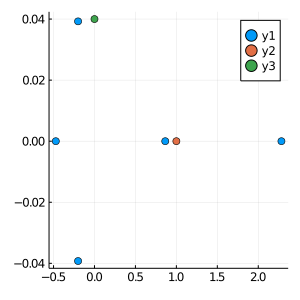

In [58]:
scatter(lreal,limag,size=[300,300])
scatter!([1],[0])
scatter!([0],[0.04])

The reciprocal of the distance between the red dot and the blue dots represent
the eigenvalues of $B$.  We now try a different shift using a green dot that
is closer to one of the complex eigenvalues.

Note that the scale on the imaginary
axis is very streched compared to the real axis.  Therefore, the green dot is
actually much closer to the complex conjugate pair at the bottom of the
graph than it looks in the picture.

In [57]:
B=inv(A-0.04im*I5)

5×5 Array{Complex{Float64},2}:
 -5.38886+1.34092im    0.845468-0.233867im  …   -2.55373+0.924513im
 -1.33746+0.13631im   -0.428572+0.146132im     -0.408669+0.185069im
  2.79216-0.540375im  -0.846611+0.104276im        1.6023-0.407256im
 0.235684+0.129776im    1.10753-0.186958im       1.07459-0.0817932im
  1.41899-0.439497im   0.593792+0.027995im     -0.577469-0.196677im

In [74]:
x=x0
for i=1:10
    y=B*x
    kmax=findmax(abs.(y))[2]
    x=y/y[kmax]
end

Here ```b2lambda``` is the approximate eigenvalue of the $B$.

In [75]:
b2lambda=x'*B*x/(x'*x)

-5.4420724355684955 + 0.04160965151088069im

In [76]:
alpha=0.04im
finv(y)=alpha+1/y

finv (generic function with 1 method)

In [77]:
finv(b2lambda)

-0.18374278460286117 + 0.03859511733342719im

In [72]:
x'*A*x/(x'*x)

-0.20036203927460988 + 0.03921823262131716im

In [73]:
eigvals(A)[3]

-0.20037985388454294 + 0.03925070427347015im

Aha!  That's another eigenvalue of $A$, but it's not really
that close.  One could increase the number of iterations for
a better approximation.  To see why this iteration does not
converge as quickly as the previous one, let's look at the
magnitude of the eigenvalues of $B$.

In [80]:
sort(abs.(eigvals(B)))

5-element Array{Float64,1}:
 0.43797891551944873
 1.1559257308581499
 2.109789250063254
 4.640745481792021
 4.990486764108617

Note that rate that the ratio of the largest to second largest eigenvalue in
magnitude determines the rate of convergence.  In this case
$$
\Big({4.640745481792021\over 4.990486764108617}\Big)^n
$$
tends to zero as $n\to\infty$ determines how fast the iteration converges.
Since this ratio is close to $1$ (but of course still less),
then the rate of convergence
will be slower than in the previous example.

We can obtain faster convergence by using the new approximation ```finv(b2lambda)```
of the eigenvalue
to construct a different shifted inverse ```Bbetter``` for which the power method
has faster convergence properties.

In [83]:
Bbetter=inv(A-finv(b2lambda)*I5)

5×5 Array{Complex{Float64},2}:
 -42.1632+45.1196im   9.46543-0.490508im   …  -28.0544+47.2458im
 -8.82996-11.0427im  -2.62948+3.66038im       -10.4311-6.88396im
  17.6858-19.2107im   -4.5782+0.403193im       11.9551-19.9739im
 0.424046+26.52im     5.91541-4.80023im        7.95857+21.5164im
  14.3577-15.9068im  -2.05322-0.0163709im      7.67851-16.484im

In [84]:
sort(abs.(eigvals(Bbetter)))

5-element Array{Float64,1}:
  0.40536554181713363
  0.9536201849283357
  3.4350439228084357
 12.562215316735697
 60.06012846508744

Since the ratio of the largest to second largest eigenvalue in magnitude
is much closer to 0, the powers
$$
    \Big({12.562215316735697\over 60.06012846508744}\Big)^n
$$
converge to $0$ much faster as $n\to\infty$ than before.

In [85]:
x=x0
for i=1:10
    y=Bbetter*x
    kmax=findmax(abs.(y))[2]
    x=y/y[kmax]
end

In [86]:
x'*A*x/(x'*x)

-0.20037986214656098 + 0.03925070231796721im

This converges fast and is a much better approximation for $\lambda$.  Note that
it is possible to update the shift in $B$ every $10$ iterations or even more often
to obtain a method with faster than linear convergence.